# Imports

In [4]:
import fit_schechter as fs
import numpy as np
import os, sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use(['default','seaborn-bright','seaborn-ticks'])
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

# Fit LF

The Schechter luminosity function is described by:

$$ \phi(L) dL = \phi_\star \left(\frac{L}{L_\star}\right)^\alpha e^{-L/L_\star} d\left(\frac{L}{L_\star}\right)$$

Or, in terms of log luminosity:

$$ \Rightarrow \boxed {\phi(\log_{10} L) = \ln{10} \times \phi_\star \left(\frac{L}{L_\star}\right)^{\alpha+1} e^{-L/L_\star} }$$

We want to find $\alpha$, $L_\star$ and $\phi_\star$. In the following:

`params = [alpha, log10(Lstar), log10(phi_star)]`

In this code, we try to find $\alpha$, $L_\star$ and $\phi_\star$ such that the following is minimised:

$$ \sum_i \left(\ln{\phi_\mathrm{input}(L_i)} - \ln{\phi(L_i, \alpha, L_\star, \phi_\star)}\right)^2 $$

## Setup fake LF for an example to fit

Text(0, 0.5, '$\\phi[\\mathrm{cMpc}^{-3}\\, (\\log_{10} L_\\alpha)^{-1}]$')

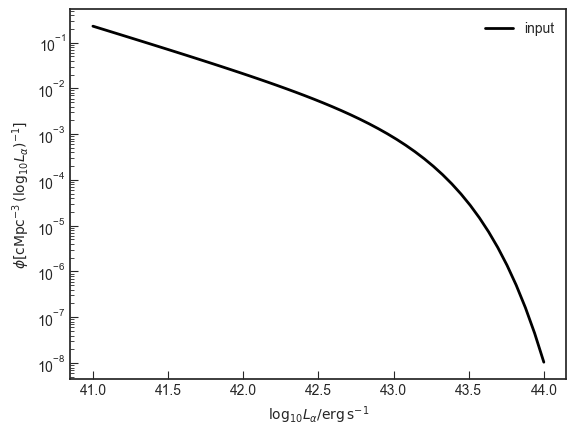

In [2]:
# log L grid
logL = np.linspace(41, 44)

# input 'true' parameters
params_true = [-2., 43., -3]

# generate the LF from these parameters
logL_LF = fs.schechter_logL(logL, *params_true)

# -------------------------------------
# Plot
plt.semilogy(logL, logL_LF, c='k', lw=2, label='input')

plt.legend()
plt.xlabel(r'$\log_{10} L_\alpha/{\mathrm{erg \, s}^{-1}}$')
plt.ylabel(r'$\phi[\mathrm{cMpc}^{-3}\, (\log_{10} L_\alpha)^{-1}]$')

## Fit the fake LF using scipy curve_fit

Note: the errors will be small as it's probably a perfect fit!

In [3]:
# find the fitted params and their errors
p_scipy, err = fs.fit_schechter_scipy(logL, logL_LF, logL_min=42.5, logL_max=44.)
print(p_scipy, err)

[-2. 43. -3.] [3.70157787e-14 5.94766594e-15 1.63759034e-14]


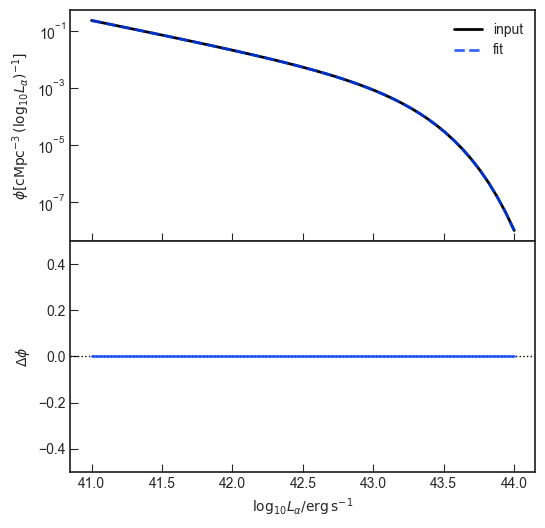

In [4]:
# Plot
fig, ax = plt.subplots(2,1, figsize=(6, 6))

# Plot the input LF
ax[0].semilogy(logL, logL_LF, c='k', lw=2, label='input')

# Plot the model LF
ax[0].plot(logL, fs.schechter_logL(logL, *p_scipy), ls='dashed', lw=2, alpha=0.8, label='fit')

# Plot the fractional difference between the model and the data
ax[1].axhline(0, lw=1, ls='dotted', c='k')
ax[1].plot(logL, (fs.ln_schechter_logL(logL, *p_scipy)-np.log(logL_LF))/np.log(logL_LF), lw=2, alpha=0.8)


ax[0].legend()

ax[1].set_xlabel(r'$\log_{10} L_\alpha/{\mathrm{erg \, s}^{-1}}$')
ax[0].set_ylabel(r'$\phi[\mathrm{cMpc}^{-3}\, (\log_{10} L_\alpha)^{-1}]$')
ax[1].set_ylabel(r'$\Delta \phi$')
ax[1].set_ylim(-0.5,0.5)

fig.subplots_adjust(hspace=0)


## Fit using emcee

In [5]:
# Run emcee to get posterior samples
sampler = fs.fit_schechter_emcee(logL, logL_LF, logL_min=42.5, logL_max=44.)

100%|██████████| 1000/1000 [00:09<00:00, 108.37it/s]


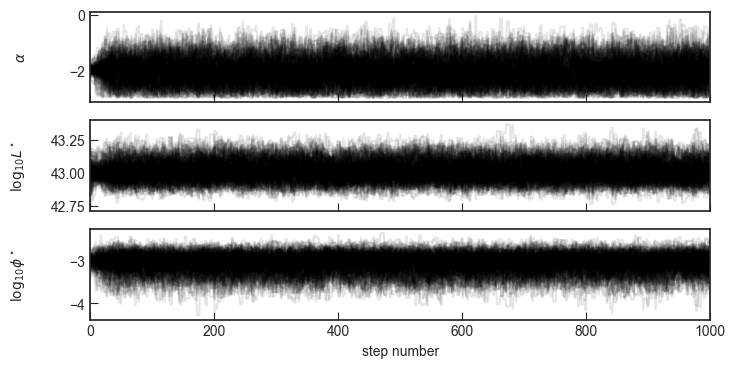

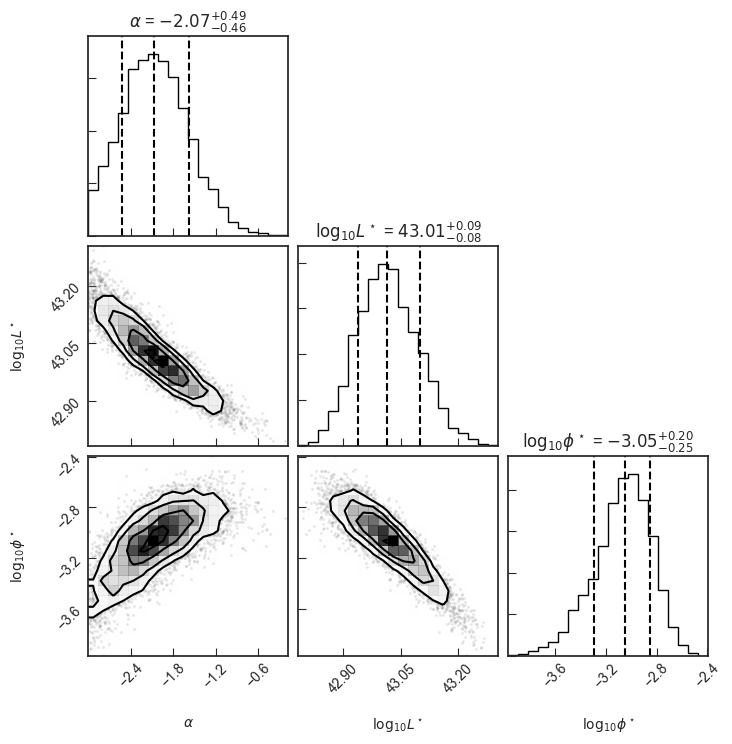

In [6]:
# Plot posterior chains and corner plot
fs.plot_emcee(sampler)

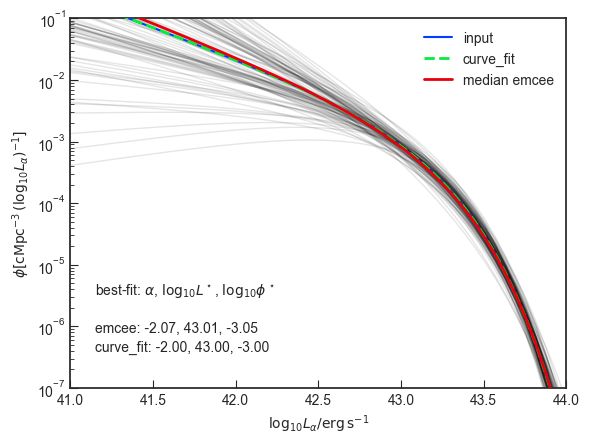

In [7]:
fs.plot_emcee_draws(sampler, logL, logL_LF)

### Print 

alpha, alpha_l, alpha_u, logLstar, logLstar_l, logLstar_h, logphistar, logphistar_l, logphistar_h

In [11]:
print(fs.get_emcee_params(sampler))

-2.07	0.46	0.49	43.01	0.08	0.09	-3.05	0.25	0.20
